<h1><center>Predicting Students Academic Success Based on Lifestyle Factors</center></h1>
<h2><center>CMSC320 Final Tutorial | Fall 2019 | John Dickerson <br>Taylor Breitzman ~ Caroline Paul</center></h2>

<img src="picture.png">
Source: <a href="https://www.qces.qcusd.org/FAQ">Queen Creek Elementary School </a> 

<h1><u>Table of Contents</u></h1>
<ol type = "1"> 
    <li><b>Introduction</b></li>
    <ul>
        <li>Other Resources</li>
        <li>Factors</li>
    </ul>
    <li><b>Reading in the Data</b></li>
    <ul>
        <li>Cleaning and Tidying up</li>
    </ul>
    <li><b>Overview of Sample Size</b></li>
    <ul>
        <li>Age Group</li> 
        <li>Living Conditions</li>
        <li>Gender Diversity</li>
        <li>Parental Guidance</li>
        <li>Romantic Relationships</li>
        <li>Overall Grades</li>
    </ul>
    <li><b>Exploratory Anylasis</b></li>
    <ul>
        <li>Broad Correlation of all facotrs</li>
        <ul>
            <li>Final Grades</li>
        </ul>
        <li>Romatic Relationships</li>
        <ul>
            <li>Absances</li>
            <li>Final Grades</li>
        </ul>
        <li>Family Quality</li>
        <ul>
            <li>Absances</li>
            <li>Final Grades</li>
        </ul>
        <li>Health</li>
        <ul>
            <li>Final Grades</li>
        </ul>
        <li>Extracirricular Activities</li>
        <ul>
            <li>Percentage</li>
            <li>Free Time</li>
            <li>Final Grade</li>
        </ul>
    </ul>
    <li><b>Averages</b></li>
    <ul>
        <li>Abstances</li>
        <li>HealthQuality</li>
        <li>Study Time</li>
        <li>Final Grades</li>
    </ul>
    <li><b>Machine Learning</b></li>
    <ul>
        <li>Predicting Abstances vs Final Grades</li>
        <li>Predicting Health Quality vs Final Grades</li>
        <li>Predicting Study Time vs Final Grades</li>
    </ul>



<h1><u>Introduction</u></h1>

All over the globe, billions of people wake up every day and sit in a classroom for multiple hours learning information that is expected to help them in the future. Academics is such a huge part of everyone’s lives from when they are a kid and could barely talk to when they are in their 20’s and attending university and deciding a life path. In the school system grades a huge indication of how successful you are. The letters A through F have a huge impact on student’s lives as it determines a lot of students futures. In addition to simply knowing the information, there are so many other factors that go into a students grading and academic success.

This dataset contains information from about 382 college students who were surveyed about several factors that may or may not influence academic success. For this project, our group is going to look into these life factors to see how drastically they a students grade.
    
Factors such as divorced households, romantic relationships, health, and quality of family relationships all affect students mentally. We predict that all of these factors will come into play in determining a students academic performance. Certain factors such as relationships and home life can also affect a students attendance which ultimately can affect their grade. We look into each of these factors and develop correlations between each factor, such as relationships and absences and then draw further conclusions on final grades. This study will help us determine how these factors play a role in students' lives and how they contribute to academic success or failure.

<h2>Other Resources</h2>

If you would like to read more about the influence of lifestyle factors on academic success here are some similar case studies:
<ul>
    <li> <a href="https://www.tandfonline.com/doi/abs/10.1080/07924360120043621">Who Succeeds at University? Factors predicting academic performance in first year Australian university students </a></li>
    <li> <a href="https://link.springer.com/article/10.1007/s10734-004-6664-2">Relations between student learning patterns and personal and contextual factors and academic performance </a></li>
    <li> <a href="https://www.sciencedirect.com/science/article/abs/pii/S0260691712001165">Factors influencing nursing students' academic and clinical performance and attrition: An integrative literature review </a></li>


In [79]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

<h2>Factors relating to Academic Success</h2>

<b>Sex</b>: <br> male (M) or female (F) <br> 
<b>Age</b>: <br> age (15-22) <br>
<b>Living</b>: <br> living situation: urban setting (U) or rural setting (R) <br> 
<b>Divorce</b>: <br> divorce status: living together (T) or divorced (D) <br> 
<b>Mom edu</b>: <br> Mother's education: 0 = none, 1 = primary education (4th grade), 2 = (5th to 9th grade), 3 = (secondary education,) or 4= (higher education) <br> 
<b>Dad edu</b>: <br> Father's education: 0 = none, 1 = primary education (4th grade), 2 = (5th to 9th grade), 3 = (secondary education), or 4 = (higher education)<br> 
<b>Guardian</b>: <br> 'mother', 'father' or 'other' <br> 
<b>Study Time</b>: <br> study time: 1 = (<2 hours), 2 = (2 to 5 hours), 3 = (5 to 10 hours), 4 =  (>10 hours)) <br> 
<b>Failures</b>: <br> Number of past class failures (numeric: n if 1<=n<3, else 4 <br> 
<b>Activities</b>:  <br>Extra-curricular activities: (yes) or (no) <br> 
<b>Relationship</b>:  <br>A romantic relationship (yes) or (no) <br> 
<b>Fam_quality</b>:  <br>Quality of family relationships (numeric: from 1 - very bad to 5 - excellent) <br> 
<b>Free time</b>: <br>Free time after school (numeric: from 1 - very low to 5 - very high) <br>
<b>Going out</b>: <br>Going out with friends (numeric: from 1 - very low to 5 - very high) <br> 
<b>Health</b>:  <br>Current health status (numeric: from 1 - very bad to 5 - very good) <br>
<b>Absences</b>: <br>Number of school absences (numeric: from 0 to 93)<br> 
<b>Final Grade</b>: <br>Final grade (numeric: from 0 to 20)<br> 

<h1><u>Reading the Data:</u></h1>

In [59]:
# reading in the dataset for factors of academic success
data = pd.read_csv("academic_success.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<h2>Cleaning & Tidying the Data:</h2>

In [60]:
# dropping columns we will not be using in the study
data = data.drop(['school', 'traveltime', 'schoolsup', 'Mjob', 'Fjob', 'reason', 'failures', 'famsup', 'famsize','internet','paid', 'nursery', 'higher', 'G1', 'G2', 'Dalc', 'Walc'], axis =1)
data.head()

,sex,age,address,Pstatus,Medu,Fedu,guardian,studytime,activities,romantic,famrel,freetime,goout,health,absences,G3
0,F,18,U,A,4,4,mother,2,no,no,4,3,4,3,6,6
1,F,17,U,T,1,1,father,2,no,no,5,3,3,3,4,6
2,F,15,U,T,1,1,mother,2,no,no,4,3,2,3,10,10
3,F,15,U,T,4,2,mother,3,yes,yes,3,2,2,5,2,15
4,F,16,U,T,3,3,father,2,no,no,4,3,2,5,4,10


In [61]:
# cleaning the column names to make more sense
data.columns = ['sex', 'age', 'living', 'divorce?', 'mom_edu', 'dad_edu', 'guardian', 'study_time','activities', 'relationship', 'fam_quality', 'free_time', 'going_out', 'health', 'absences', 'grade']
data.head()

,sex,age,living,divorce?,mom_edu,dad_edu,guardian,study_time,activities,relationship,fam_quality,free_time,going_out,health,absences,grade
0,F,18,U,A,4,4,mother,2,no,no,4,3,4,3,6,6
1,F,17,U,T,1,1,father,2,no,no,5,3,3,3,4,6
2,F,15,U,T,1,1,mother,2,no,no,4,3,2,3,10,10
3,F,15,U,T,4,2,mother,3,yes,yes,3,2,2,5,2,15
4,F,16,U,T,3,3,father,2,no,no,4,3,2,5,4,10


In [62]:
# changing the variable 'A' that represents 'Apart' to 'D' to represent 'Divorce' for clarity purposes
data['divorce?'] = data['divorce?'].replace('A', 'D')
data.head()

,sex,age,living,divorce?,mom_edu,dad_edu,guardian,study_time,activities,relationship,fam_quality,free_time,going_out,health,absences,grade
0,F,18,U,D,4,4,mother,2,no,no,4,3,4,3,6,6
1,F,17,U,T,1,1,father,2,no,no,5,3,3,3,4,6
2,F,15,U,T,1,1,mother,2,no,no,4,3,2,3,10,10
3,F,15,U,T,4,2,mother,3,yes,yes,3,2,2,5,2,15
4,F,16,U,T,3,3,father,2,no,no,4,3,2,5,4,10


<h1><u>Overview of Sample Size:</u></h1>

Lets get an a basic overview of what our data looks like - 

<h2>What is the age group?</h2>

In [63]:
ages = data["age"].value_counts()
labels = (np.array(ages.index))
sizes = (np.array((ages / ages.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Аge of students")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="age")

Our dataset has a very narrow age group of 15-22 year olds. The pie chart shows that 92.7% of the sample is strictly 15-18 year olds, and the 19-22 age group only makes up 7.3% of the data. That means that the majority of our data collection is centered around teenagers instead of young adults. This age group is mainly high-school and early college students which is important to keep in mind when we consider these lifestyle factors that contribute to academic success.

<h2>Where is our sample of people living?</h2>

Text(0.5, 1, 'Living Conditions: U: Urban & R: Rural')

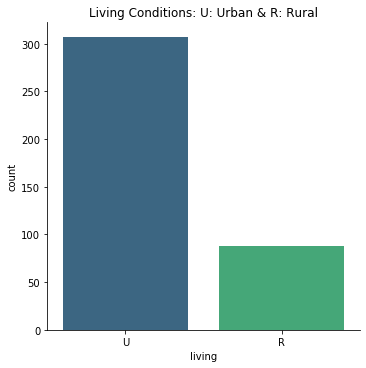

In [64]:
sns.catplot(x="living", kind="count",palette="viridis", data=data, height = 5)
plt.title("Living Conditions: U: Urban & R: Rural")

Just to get a general idea of the demographic of students we were looking at we decided to look into their living situation. Most of the students in the study lived in an urban city setting. Geographic location influences a lot of lifestyle choices and we will see later on if it ultimately has an affect on their study time and final grades as well.

<h2>What is the gender diversity of our sample?</h2>

Text(0.5, 1, 'Gender of students: F: Female & M: Male')

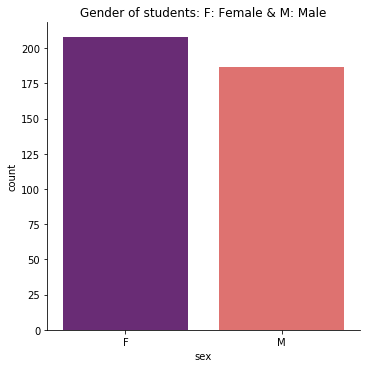

In [45]:
sns.catplot(x="sex", kind="count",palette="magma", data=data, height = 5)
plt.title("Gender of students: F: Female & M: Male")

The gender diversity of our sample was another important aspect to consider. Fortunately this dataset contains a pretty gender neutral stance with a slight skew toward females. We see that there are slightly more females than males in the study, but this should not affect the data that much.

<h2>What is the parental guidance situation?</h2>

Text(0.5, 1, 'Guardian Figure of Students')

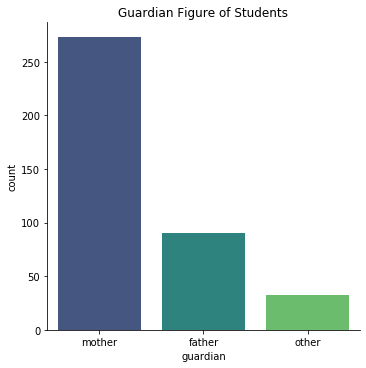

In [46]:
sns.catplot(x="guardian", kind="count",palette="viridis", data=data, height = 5)
plt.title("Guardian Figure of Students")

Text(0.5, 1, 'Students from a Divorced Household ')

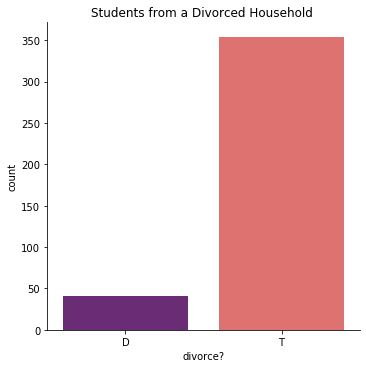

In [47]:
sns.catplot(x="divorce?", kind="count",palette="magma", data=data, height = 5)
plt.title("Students from a Divorced Household ")

A students home life impacts a lot of facets of their life especially academics. The dataset we’re working with includes data about the students guardian, if they come from a divorced household, and a rating of the quality of their family relationships. Family relationships and divorces have a huge impact on a person mentally, and we wanted to see if it affects their academic performance. The following graphs show that the majority of our sample consider their mother their main guardian and do not have divorced parents. 

<h2>Who is involved in Romantic Relationships?</h2>

Text(0.5, 1, 'Percentage of Students in a relationship')

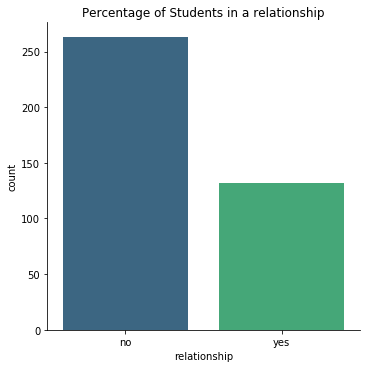

In [48]:
sns.catplot(x="relationship", kind="count",palette="viridis", data=data, height = 5)
plt.title("Percentage of Students in a relationship")

Being involved in a romantic relationship can also largely impact a students emotional and mental wellness. In addition to affecting a person mentally, being in a relationship can also affect how much free time and study time a person has, which we will analyze more closely later. We wanted to get a general idea of how much of the sample is involved in a  romantic relationship that could ultimately affect other factors of their academic performance. The graph shows that more than half of our sample is not in a relationship.

<h2>Overall grade distribution of the sample size?</h2>

Mean final grade distribution: 10.415189873417722


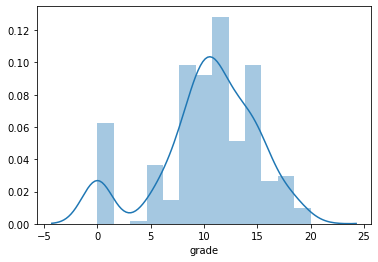

In [32]:
sns.distplot(data['grade'])
print("Mean final grade distribution:", data['grade'].mean())

Before moving on to a more exploratory analysis of these factors we wanted to see what the overall grade distribution of our sample was like. 
The overall grade distribution shows to have a consistent curve.  The grades were given on a scale from 1-20, and the mean grade is 10.41, which is directly in the middle of the grade scale. This shows that a lot of the students grades were average in the middle and that there are a few below average and above. 

<h1><u>Exploratory Analysis:</u></h1>

Now that we have a surface level overview of what our sample data set consists of lets do a deeper exploratory analysis. Here we will dig deeper in each of the factors of academci success to see which ones have the biggest impact. 

<h2>Broad perspective on the correlation of these academic success factors....<h2>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

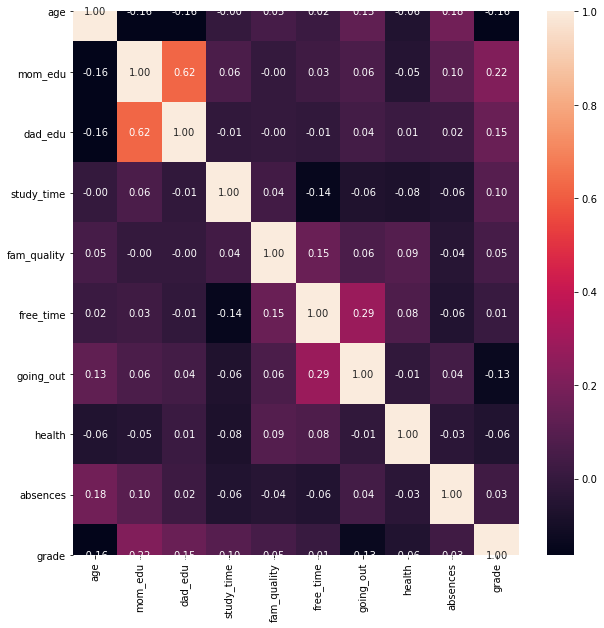

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

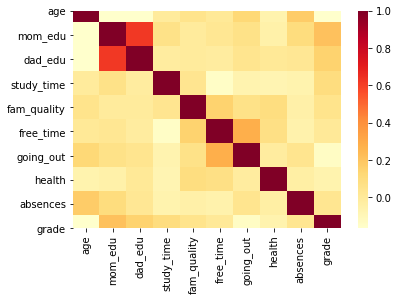

In [14]:
sns.heatmap(data.corr(),cmap="YlOrRd")

This map is a heat map that shows the correlation between all of the variables in the dataset. Each one of the squares shows the correlation between the variables that range from -1 to 1. When the variables are closer to 0, this means that there is not a correlation between those variables. When the number is closer to 1, they have a positive correlation, meaning that they both increase at similar rates. When the number is closer to -1 they have a negative correlation, so when one variable increases the other variable is decreasing but at similar rates. The straight diagonal of 1 is in the graph because the variables are being compared to themselves so it is a perfect positive correlation. 

When looking at this heatmap it is seen that there is not a huge correlation between a lot of the variables as most of them are towards 0. The only variables that have a bit of a correlation are mom and dad edu status. 

<h2>How time spent studying affects final grades</h2>

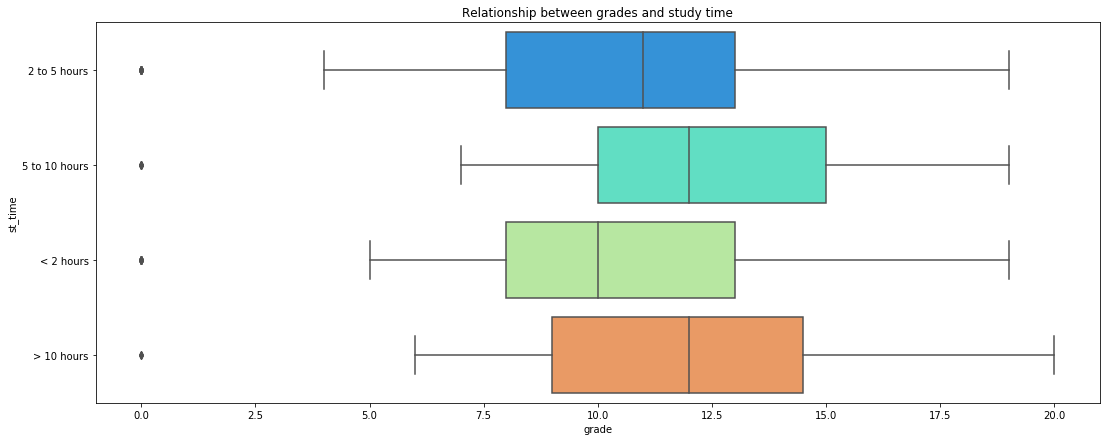

In [16]:
plt.figure(figsize=(18,7))
plt.title("Relationship between grades and study time")
sns.boxplot(y="st_time", x="grade", data = data , orient="h", palette = 'rainbow')

Now we will analyze the correlation between the amount of hours studying and final grades. With no surprise the lowest average on final grades comes from the percentage of students who studied less than 2 hours per week. The two highest averages come from the student groups who spent 5-10 hours and greater than 10 hours a week studying. Interestingly enough, these two groups have almost the exact same average and the 5-10 hour student group has a better high grade. We can infer from this data that spending more time studying does correlate to higher averages, but can be capped at 10 hours. The students studying greater than 10 hours a week did not have better grades than students studying 5-10. From the earlier pie chart we saw that the majority of the students spent between 2 and 5 hours on their schoolwork. The average of this group was greater than those who spent less than 2 hours but less than those who spent more than 5 hours. This further demonstrates the relationship between hours studying and final grades. 


<h2>How Romantic relationships are affecting absences?</h2>

Mean absence value for single people: 4.840304182509506
Mean absence value for people in relationships: 7.4393939393939394


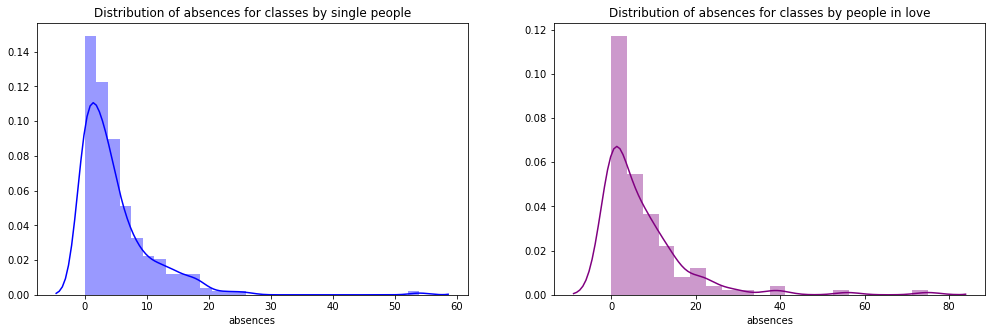

In [17]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.relationship == 'no')]["absences"],color='blue',ax=ax)
ax.set_title('Distribution of absences for classes by single people')
print("Mean absence value for single people:", data[(data.relationship == 'no')]["absences"].mean())

ax=f.add_subplot(122)
sns.distplot(data[(data.relationship == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')
print("Mean absence value for people in relationships:", data[(data.relationship == 'yes')]["absences"].mean())

Given the age range of our students we can infer that relationships play a big role in their lives and could ultimately affect their academics. We wanted to analyze this in closer detail by seeing how relationships affect absences from school. In the charts below we compared the absences between single people and those involved in romantic relationships to see if there was a correlation with absences. We do see that single people attend class a lot more on average. The average absences value for single students was only 4 compared to those in relationships which was 7.

<h2>Does being in a relationship affect their free time?</h2>

Mean free time value for single people: 3.2433460076045626
Mean free time value for people in relationships: 3.2196969696969697


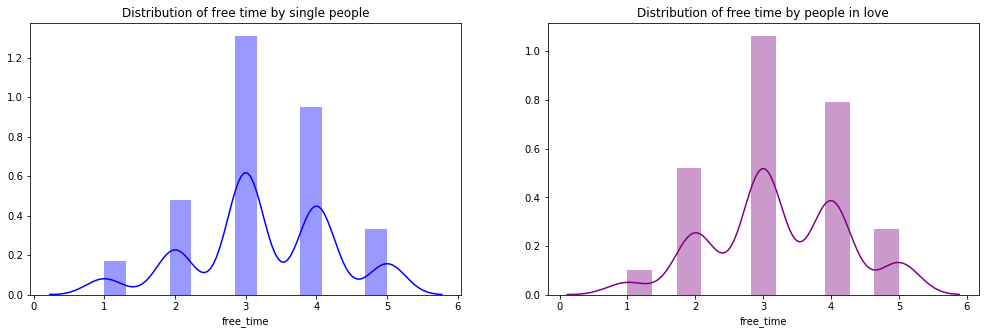

In [35]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.relationship == 'no')]["free_time"],color='blue',ax=ax)
ax.set_title('Distribution of free time by single people')
print("Mean free time value for single people:", data[(data.relationship == 'no')]["free_time"].mean())

ax=f.add_subplot(122)
sns.distplot(data[(data.relationship == 'yes')]['free_time'],color='purple',ax=ax)
ax.set_title('Distribution of free time by people in love')
print("Mean free time value for people in relationships:", data[(data.relationship == 'yes')]["free_time"].mean())

In these graphs we are trying to see how being in a relationship affects a person's amount of free time. It is shown that there is not much correlation between free time and romantic relationships because the averages for each of these graphs are fairly similar. The averages are 3.24 for single people and 3.22 for people in relationships. Thus, both groups have a medium amount of free time, but there is not a difference in each of the averages so a definitive conclusion can not be drawn. 

<h2>Does being in a romantic relationship affect their grade as well?</h2>

Mean grade value for single people: 10.836501901140684
Mean grade value for people in relationships: 9.575757575757576


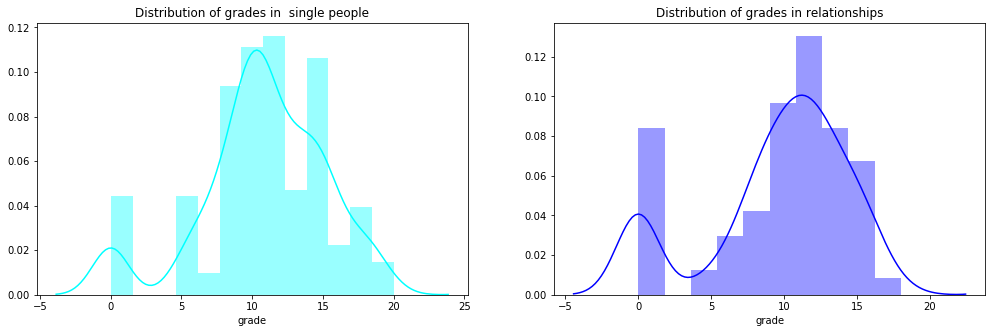

In [18]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.relationship == 'no')]["grade"],color='cyan',ax=ax)
ax.set_title('Distribution of grades in  single people')
print("Mean grade value for single people:", data[(data.relationship == 'no')]["grade"].mean())

ax=f.add_subplot(122)
sns.distplot(data[(data.relationship == 'yes')]['grade'],color='blue',ax=ax)
ax.set_title('Distribution of grades in relationships')
print("Mean grade value for people in relationships:", data[(data.relationship == 'yes')]["grade"].mean())

We see that people involved in relationships attend class less frequently than those who are single, now we will see how this affects their final grades. The graphs below show a slightly higher grade average in single students than those in relationships. Single students had an average grade value of 10.8 where students had an average grade of 9.5.  From these results we can assume that students in relationships spend more time with their significant other than studying which could lead to more absences and lower grades. However, this conclusion cannot be definitive considering the average of students in relationship was not significantly lower, and other factors could come into play well. We will conduct more studies to see if absence and grades has a strong correlation or if the other emotional factors of romantic and family relationships are more influential.

<h2>How poor family quality is affecting absences?</h2>

Mean absence value for bad family quality: 6.875
Mean absence value for good family quality: 4.952830188679245


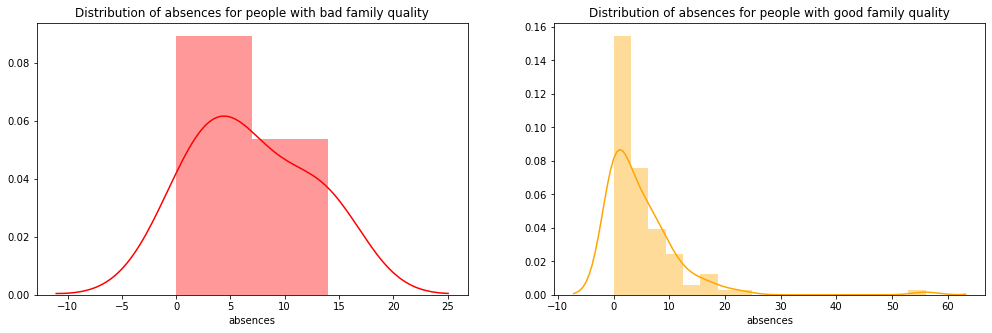

In [19]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.fam_quality == 1)]["absences"],color='red',ax=ax)
ax.set_title('Distribution of absences for people with bad family quality')
print("Mean absence value for bad family quality:", data[(data.fam_quality == 1)]["absences"].mean())

ax=f.add_subplot(122)
sns.distplot(data[(data.fam_quality == 5)]['absences'],color='orange',ax=ax)
ax.set_title('Distribution of absences for people with good family quality')
print("Mean absence value for good family quality:", data[(data.fam_quality == 5)]["absences"].mean())

Family quality and home life is crucial to having healthy mental stability. This data provides a measure of a person's family quality on a scale from 1-5: 1 correlating to a poor family relationship and 5 meaning a very healthy family relationship. If a student suffers from family issues, it can affect their attendance in school which we saw in the romantic relationship case can impact a students grade. The graphs show a mean absence value of 6.8 for students who admit to having a poor relationship with their family. The students who claim to have a very positive home life have a lower mean absence value of about 5.9. 

<h2>What about family quality and grades?</h2>

Mean grade value for bad family quality: 10.625
Mean grade value for good family quality: 10.830188679245284


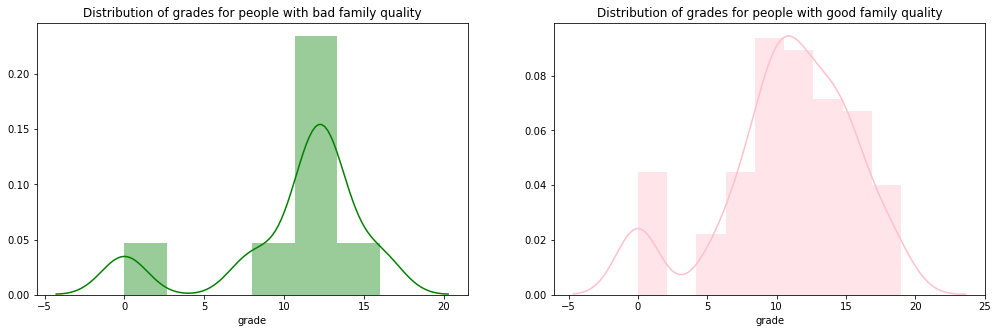

In [20]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.fam_quality == 1)]["grade"],color='green',ax=ax)
ax.set_title('Distribution of grades for people with bad family quality')
print("Mean grade value for bad family quality:", data[(data.fam_quality == 1)]["grade"].mean())

ax=f.add_subplot(122)
sns.distplot(data[(data.fam_quality == 5)]['grade'],color='pink',ax=ax)
ax.set_title('Distribution of grades for people with good family quality')
print("Mean grade value for good family quality:", data[(data.fam_quality == 5)]["grade"].mean())

Here we take a deeper look on family quality to see how it affects students' grades. This graph shows a very insignificant difference between family quality and average grade value. Those with lower family quality have a mean grade of 10.6, while students with higher family quality have a mean grade of 10.8. With only a 0.2 difference in grade averages, I dont think a strong enough correlation can be made between family quality and final grades.

<h2>Let's look into Health..</h2>

In [111]:
labels = data["health"].unique().tolist()
amount = data["health"].value_counts().tolist()

colors = ["coral","lightgreen","pink","cyan","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Current health status (numeric: from 1 - very bad to 5 - very good)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'h_chart')

Unfortunately, only 23% of our sample size ranked their health at a perfect 5. This means the majority of our study had some health setbacks that should be considered when looking into their final grades. Health can be a huge contributor in attendance and grade average. In this pie chart we see that the most common rank on a scale from 1-5 was a 3. 37% of our students have average health quality. While there is no description as to what the health level of 3 exactly means, we know that it neither great health nor really bad. We can infer that the majority of our sample size has average health status.

<h2>How does the quality of their health affect their final grade?</h2>

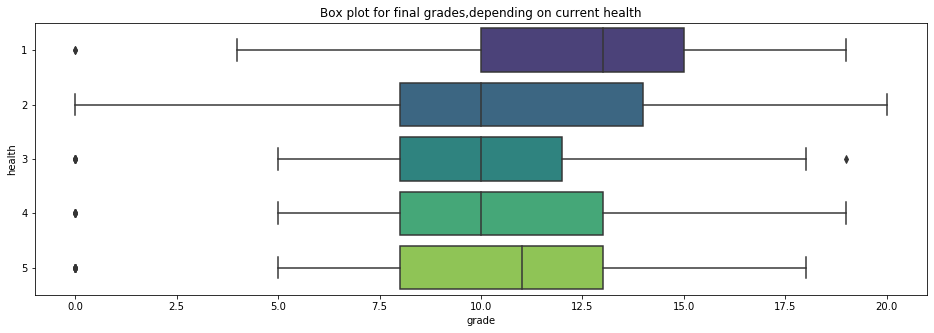

In [22]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on current health")
sns.boxplot(y="health", x="grade", data = data , orient="h", palette = 'viridis')

This box and whisker plot shows the grade ranges for each level of health. These results were quite interesting in that the students with poor health status have higher averages and overall grades. The data set did not specify if health was relating to physical or mental wellness but we can assume that it was an overall generalization of both. One possible conclusion from this data could be that students with poor mental health are doing better in school. It could be the case that students are spending so much time studying that they are being drained, but ultimately getting better grades because of it. This is sad to see that students are doing well at the cost of their health.

<h2>Distribution of absences based on health:</h2>

Mean absence value for bad health quality: 6.319148936170213
Mean absence value for good health quality: 5.6438356164383565


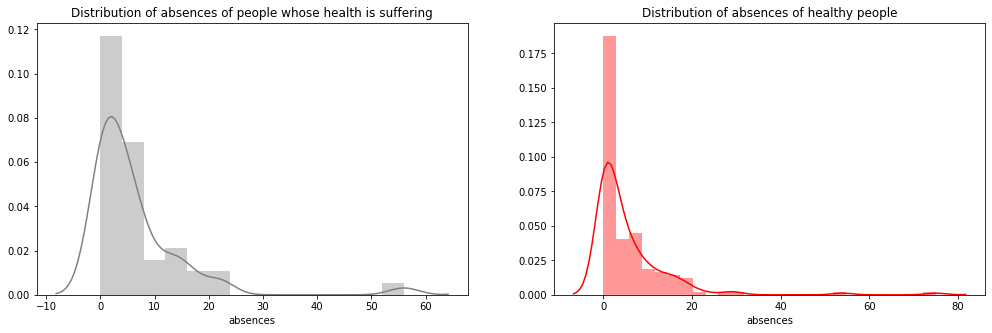

In [23]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.health == 1)]["absences"],color='grey',ax=ax)
ax.set_title('Distribution of absences of people whose health is suffering')
print("Mean absence value for bad health quality:", data[(data.health == 1)]["absences"].mean())

ax=f.add_subplot(122)
sns.distplot(data[(data.health == 5)]['absences'],color='red',ax=ax)
ax.set_title('Distribution of absences of healthy people')
print("Mean absence value for good health quality:", data[(data.health == 5)]["absences"].mean())

Previously in our study we analyzed the correlation between attendance and relationships and attendance with family quality. In this graph we measure the correlation between attendance and health status. The two graphs compare the number of absences between students with health status of 1 and 5. The mean absence value for students with poor health was 6.3, while students with better health had a mean absence value of 5.6. This is not an alarming difference and therefore we cannot claim a direct correlation between health status and attendance. We expected there to be a large distinction between the two health groups and a much greater absence value for those with poor health. If we stick to our conclusions from the box and whisker plot comparing grades and health, we can further assume that students with poor health could be a result of overworking in school. Students with poor health have shown to have higher grades and not much similar attendance as healthy kids. From these conclusions we attribute their poor health status to their hard work in school.

<h2>What percentage of people are involved in extracurricular activities..</h2>

In [112]:
ages = data["activities"].value_counts()
labels = (np.array(ages.index))
sizes = (np.array((ages / ages.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Activities")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="activities")

Based on this graph, a little over half of the students are involved in extracurricular activities. As there is only a 1% difference between the yes and no parts of the graph. This is not surprising because it is very common to have students involved in other organizations when they are not doing school work. However, some students prefer to work on personal hobbies or just focus on school, which would result in them not partaking in any extracurricular activities. 

<h2>Is there a correlation between activities and free time?</h2>

Mean free time value for people involved in extracurricular: 3.3233830845771144
Mean free time value for people not involved in extracurricular: 3.1443298969072164


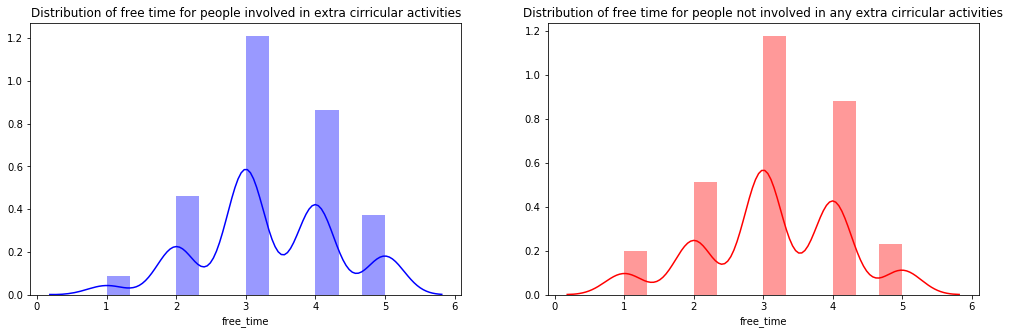

In [25]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.activities == 'yes')]["free_time"],color='blue',ax=ax)
ax.set_title('Distribution of free time for people involved in extra cirricular activities')
print("Mean free time value for people involved in extracurricular:", data[(data.activities == 'yes')]["free_time"].mean())

ax=f.add_subplot(122)
sns.distplot(data[(data.activities == 'no')]['free_time'],color='red',ax=ax)
ax.set_title('Distribution of free time for people not involved in any extra cirricular activities')
print("Mean free time value for people not involved in extracurricular:", data[(data.activities == 'no')]["free_time"].mean())

There does not seem to have a very big correlation between activities and free time because looking at these graphs because they have the same mean. There is also not a large difference between activities and free time. The averages for each graph are 3.32 and 3.14, which shows a very similar mean with no big correlation. 

<h2>What about activities and study time?</h2>

Mean study time value for people inovled in extracurricular: 2.109452736318408
Mean study time value for people not inovled in extracurricular: 1.958762886597938


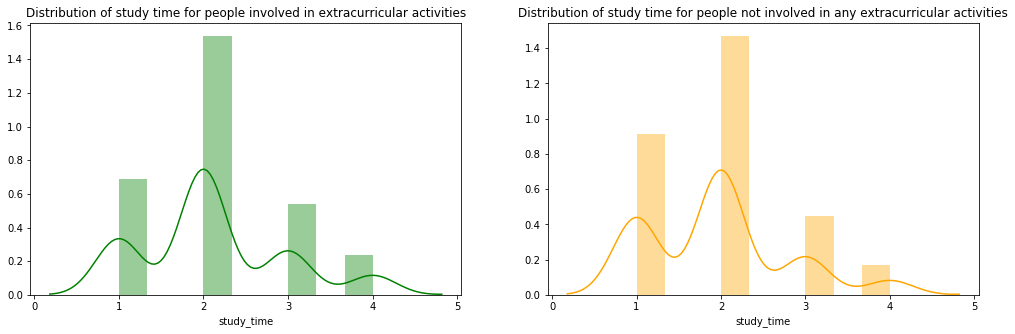

In [33]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.activities == 'yes')]["study_time"],color='green',ax=ax)
ax.set_title('Distribution of study time for people involved in extracurricular activities')
print("Mean study time value for people inovled in extracurricular:", data[(data.activities == 'yes')]["study_time"].mean())

ax=f.add_subplot(122)
sns.distplot(data[(data.activities == 'no')]['study_time'],color='orange',ax=ax)
ax.set_title('Distribution of study time for people not involved in any extracurricular activities')
print("Mean study time value for people not inovled in extracurricular:", data[(data.activities == 'no')]["study_time"].mean())

When looking at these graphs you can see that there is not a huge difference between them. However, the graph for when students are involved in extracurricular activities have a slightly lower mean of 1.96 whereas the graph with people that are not involved in extracurricular activities has a mean of 2.11. This makes sense because students that partake in extracurricular activities do not have as much time outside of school to study, which would explain the lower mean. 

<h2>Does being involved in extracurricular activities impact your final grade?</h2>

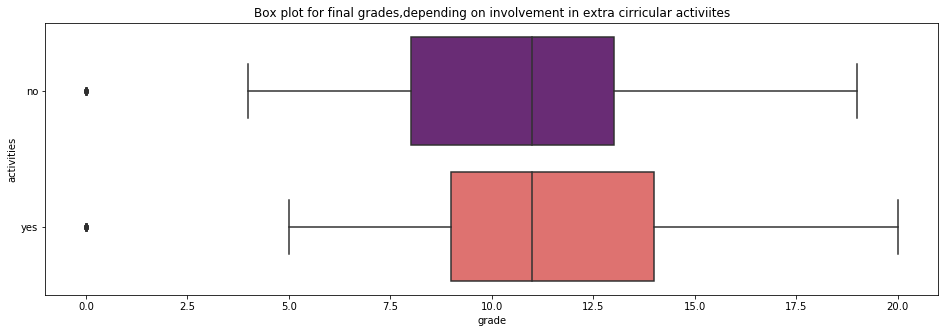

In [27]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on involvement in extra cirricular activiites")
sns.boxplot(y="activities", x="grade", data = data , orient="h", palette = 'magma')

This graph is a box and whisker plot that shows the distribution of final grades of the students based on if they are involved in extracurricular activities or not. The averages of the final grades are very similar; however, the distribution of grades around the mean are fairly different. The plot for students that are involved in extracurricular activities has more of a distribution towards higher grades at around 14.0, whereas the graph for students that are not involved in extracurricular activities has a smaller distribution towards higher grades, only going until about 13.0. Additionally, the plot for students that are involved in extracurricular activities has a smaller distribution to grades less than the average going to about 9.0 where the other graph goes to about 8. This shows that students that partake in more extracurricular activities might have a higher grades than students that do not partake in extracurricular activities. 

<h1><u>Now let us take a look at the mean values of our data before we make our final conclusions...</u></h1>

<h2>Average number of Absences:</h2>

Mean value for absences: 5.708860759493671


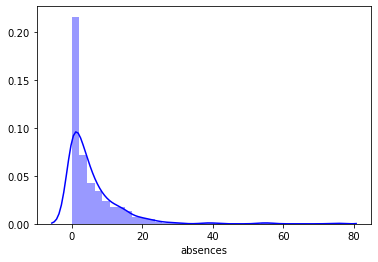

In [28]:
print("Mean value for absences:", data['absences'].mean())
sns.distplot(data['absences'], color = 'blue')
plt.show()

This graph shows the distribution for the students in the dataset. There is a high increase for students who have had 0 absences and then there is a steady decrease as the absences increase. The mean average is 5.71 which a high number being 0. This shows that there is not a lot of absences for students in general but if they do have any absences than they generally don’t have a lot.

<h2>Average Health Quality:</h2>

Mean value for Health Quality: 3.5544303797468353


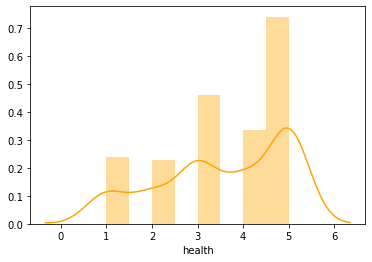

In [29]:
print("Mean value for Health Quality:", data['health'].mean())
sns.distplot(data['health'], color = 'orange')
plt.show()

This graph is a display of the health qualities of all the students in the dataset. Across the graph, the health qualities are fairly steady and constant, with a bit of an increase towards a higher health status. This is showing that the health qualities of these students are relatively high, with the average being 3.55 on a 1-5 scale. Also, the mode number of health entries is quality 5, showing that there is a good amount of students with high health quality.

<h2>Average time spent studying:</h2>

Mean value for Study Time: 2.0354430379746837


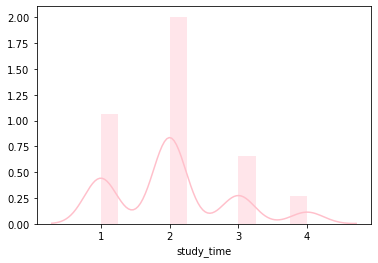

In [30]:
print("Mean value for Study Time:", data['study_time'].mean())
sns.distplot(data['study_time'], color = 'pink')
plt.show()

This is a graph that shows the study time of the students in the dataset, on a scale of 1-4. The average of the study time is 2.03, which shows that most students spend a medium amount of time studying. On the graph it shows that a majority of the students are at the mean. 

<h2>Average Final Grade:</h2>

Mean value for final grades: 10.415189873417722


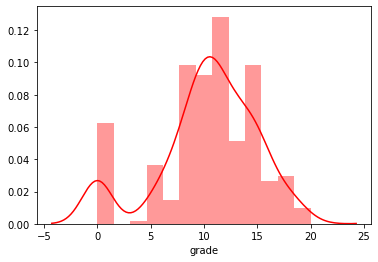

In [31]:
# mean value and distplot for final grades
print("Mean value for final grades:", data['grade'].mean())
sns.distplot(data['grade'], color = 'red')
plt.show()

For this graph it shows the distribution of final grades among the students in the dataset. This dataset seems to have a pretty solid distribution of grades on a scale from 0-20. The average of final grades is 10.4 which is very central of the range. This distribution is not skewed towards any direction and has a central theme in the middle of the graph. 

<h1><u>Machine Learning Predicitng</u></h1>

For this section we used a linear regression model to predict the final grades based on multiple factors that were given in our dataset.

<h2>Predicting Absences and Final Grades</h2>

In [110]:
# get the data for abstances and grades
x = data['absences'].values.reshape(-1,1)
y = data['grade'].values.reshape(-1,1)

# Split the data into 80% to the training and 20% to test the code
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train the Algorithim based on a linear regression 
lreg = linear_model.LinearRegression()
lreg.fit(X_train, Y_train)

# Make predictions based on the algorithm 
y_pred = lreg.predict(X_test)

# Compare the Actual Test points with the predicted values in a dataframe
df = pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted':y_pred.flatten()})
df.head()

,Actual,Predicted
0,14,10.452329
1,10,10.398610
2,9,10.519477
3,15,10.425470
4,16,10.425470


Text(0.5, 1.0, 'Predicting Abstances vs Final Grades')

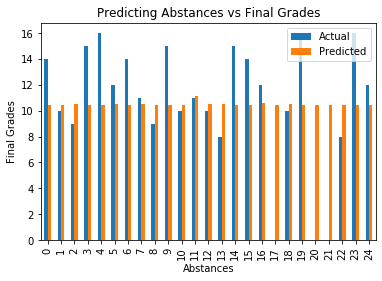

In [103]:
# plot the actual and predicted values of the dataframe
df1 = df.head(25)
df1.plot(kind='bar')
plt.xlabel("Absences")
plt.ylabel("Final Grades")
plt.title("Predicting Absences vs Final Grades")

<h2>Predicting Health Quality and Final Grades</h2>

In [104]:
# get the data for health quality and grades
x = data['health'].values.reshape(-1,1)
y = data['grade'].values.reshape(-1,1)

# Split the data into 80% to the training and 20% to test the code
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train the Algorithim based on a linear regression 
lreg = linear_model.LinearRegression()
lreg.fit(X_train, Y_train)

# Make predictions based on the algorithm 
y_pred = lreg.predict(X_test)

# Compare the Actual Test points with the predicted values in a dataframe
df = pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,14,10.431152
1,10,10.330006
2,9,10.330006
3,15,10.734591
4,16,10.330006


Text(0.5, 1.0, 'Predicting Health Quality vs Final Grades')

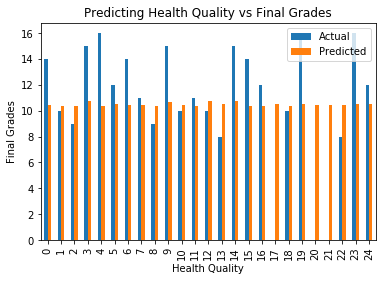

In [105]:
# plot the actual and predicted values of the dataframe
df1 = df.head(25)
df1.plot(kind='bar')
plt.xlabel("Health Quality")
plt.ylabel("Final Grades")
plt.title("Predicting Health Quality vs Final Grades")

<h2>Predicting Study Time and Final Grades</h2>

In [106]:
# get the data for study time and grades
x = data['study_time'].values.reshape(-1,1)
y = data['grade'].values.reshape(-1,1)

# Split the data into 80% to the training and 20% to test the code
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train the Algorithim based on a linear regression 
lreg = linear_model.LinearRegression()
lreg.fit(X_train, Y_train)

# Make predictions based on the algorithm 
y_pred = lreg.predict(X_test)

# Compare the Actual Test points with the predicted values in a dataframe
df = pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,14,11.263331
1,10,11.263331
2,9,11.263331
3,15,10.464573
4,16,10.464573


Text(0.5, 1.0, 'Predicting Study Time vs Final Grades')

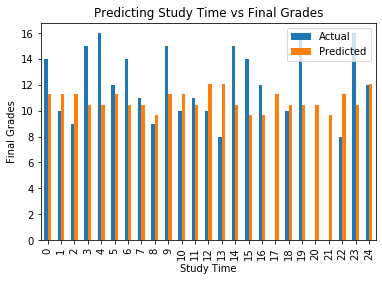

In [107]:
# plot the actual and predicted values of the dataframe
df1 = df.head(25)
df1.plot(kind='bar')
plt.xlabel("Study Time")
plt.ylabel("Final Grades")
plt.title("Predicting Study Time vs Final Grades")

Based on these graphs you can see the expected values of each factor for the final grades and the predicted value from the linear regression. Overall, for absences and health quality, the expected values are around the averages of that factor. They don’t seem to predict the values very well but are constant at predicting similar values. Then when looking at the final grades and study time prediction it is a little more varied. The predicted and actual values are a little closer, thus showing that the linear regression does a better job at predicting these data points. This shows that overall it is hard to predict a students final grades based off of one factor.

<h1><u>Conclusion</u></h1>

After analyzing how different lifestyle factors can contribute to academic success, we made a lot of interesting insights. One of the most shocking was how a person's health quality can impact academic performance. While poor health status did negatively affect a students attendance, it positively impacted their final grades. This was an interesting discovery because we hypothesized the opposite result. We predicted that people suffering from health issues would face setbacks in their academic career. These shocking results caused us to make an interesting conclusion based on academic performance and mental health. While we originally thought health would influence academic success, we now believe in the converse: academic success influences health status. A possible conclusion from these results is that students are overworking themselves in school to succeed at the cost of their own health and wellness. The pressure in the school system to be successful is putting students' health at risk. This was an alarming discovery.

Another interesting insight we drew from this study was the effectiveness of studying. Our graphs showed a correlation between hours spent studying and final grades, but there was a cap on the hours. From our graphs and final averages we see that there is no benefit to studying more than 10 hours. We also concluded that while the majority of students spend 2-5 hours studying, the most effective time range is 5-10 since these resulted in the highest final grades. This was an interesting conclusion because it shows that people don't need to dedicate their lives to their studying and only need to spend 5-10 hours a week to achieve maximum results. With this information we can recommend that students get more free time, join more extracurricular activities, and strengthen family relationships which can positively impact their success as well.
